# Problem 2

In [235]:
import networkx as nx
import random
import matplotlib.pyplot as plt
import numpy as np
from sklearn import cluster, datasets
from typing import List, Mapping

## Part A

In [236]:
# Global Constant

n = 30
k = 3
A = 0.7
B = 0.1

In [237]:
def draw_from_clusters(G: nx.Graph, clusters: List[int], pos: Mapping, title: str): 
    colors = ["royalblue", "red", "green", "orange", "purple", "yellow"]
    color_map = [colors[clusters[i]] for i in range(n)]
    edge_map = ["black" if clusters[u] == clusters[v] else "silver" for u,v in G.edges]    

    plt.figure(figsize=(8,6))
    plt.title(title)
    nx.draw(G, pos=pos, node_color=color_map, with_labels=True, edge_color=edge_map)    

### SSBM

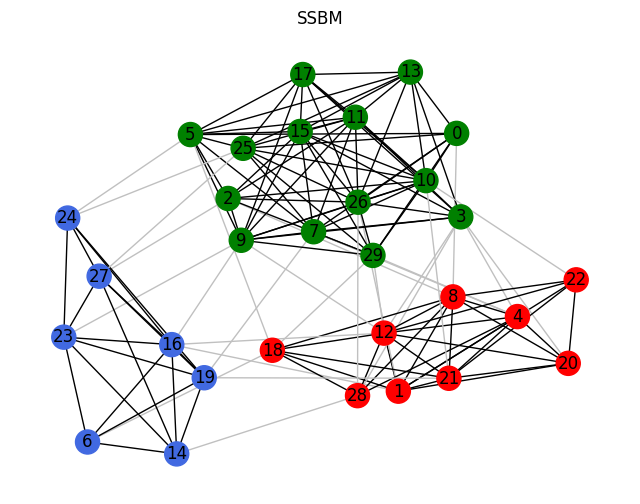

In [238]:
G = nx.Graph()
for i in range(n):
    G.add_node(i)
communities = np.random.randint(0, k, n)

for i in range(n): 
    for j in range(i + 1, n): 
        if communities[i] == communities[j]: 
            prob = random.choices([0, 1], weights=[1 - A, A])[0]
        else: 
            prob = random.choices([0, 1], weights=[1 - B, B])[0]
        if prob: 
            G.add_edge(i, j)

pos = nx.kamada_kawai_layout(G)
draw_from_clusters(G, communities, pos, "SSBM")

### K-Means Clustering

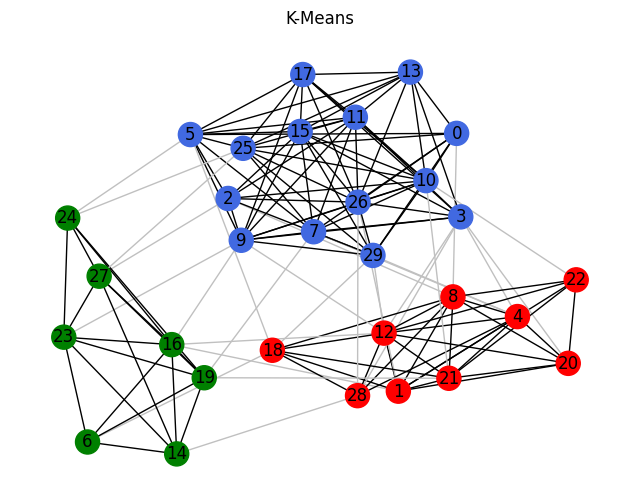

In [239]:
A = nx.to_pandas_adjacency(G)
kmeans = cluster.KMeans(n_clusters=k, n_init="auto")
kmeans.fit(A)
k_labels = kmeans.labels_

draw_from_clusters(G, k_labels, pos, "K-Means")

### Spectral Clustering

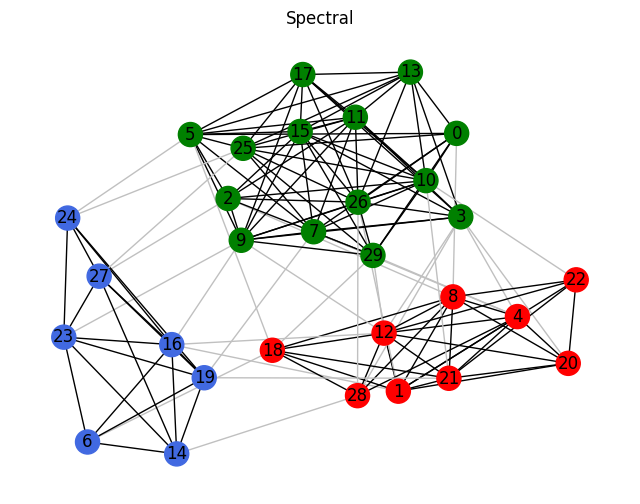

In [240]:
spectral = cluster.spectral_clustering(A, n_clusters=3)
draw_from_clusters(G, spectral, pos, "Spectral")

After running the above code many times, it appears that the SSBM clusters and Spectral clusters are identical among nearly all iterations. KMeans clustering is usually correct, but occasionally struggles to find the boundary between two clusters as defined in the original SSBM. Otherwise, the clusters are nearly identical to the original SSBM in most iterations of running the generating code. 

## Part B

### Original Clusters

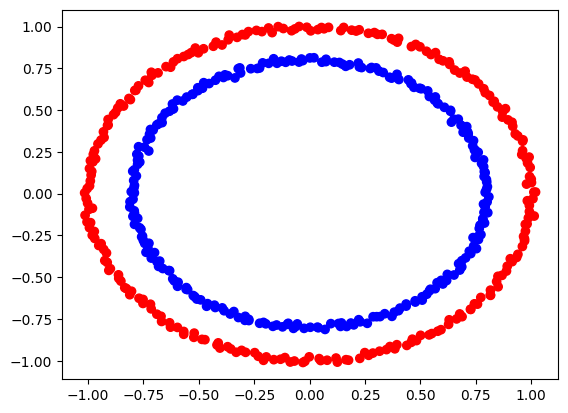

In [241]:
points, clusters = datasets.make_circles(500, noise=0.01)
x_pts = [point[0] for point in points]
y_pts = [point[1] for point in points]
color_map = ["blue" if i else "red" for i in clusters]
plt.scatter(x_pts, y_pts, c=color_map)
plt.show()

### K-Means Clustering

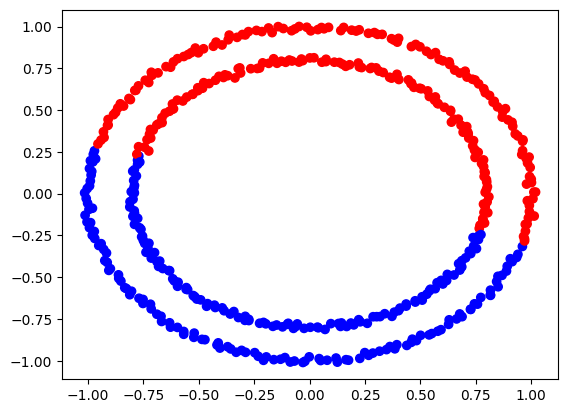

In [242]:
kmeans = cluster.KMeans(n_clusters=2, n_init="auto")
kmeans.fit(points)
k_labels = kmeans.labels_

color_map = ["blue" if i else "red" for i in k_labels]
plt.scatter(x_pts, y_pts, c=color_map)
plt.show()

### Spectral Clustering

/home/jakeg/.local/lib/python3.10/site-packages/sklearn/manifold/_spectral_embedding.py:273: UserWarning: Graph is not fully connected, spectral embedding may not work as expected.
  warnings.warn(


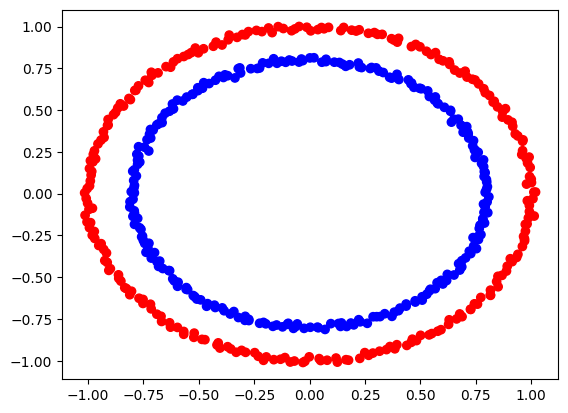

In [243]:
model = cluster.SpectralClustering(n_clusters=2, affinity='nearest_neighbors')
labels = model.fit_predict(points)
color_map = ["blue" if i else "red" for i in labels]
plt.scatter(x_pts, y_pts, c=color_map)
plt.show()

ADD EXPLANATION